In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv("/content/mail_data.csv")
dataset

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
# independent variable
email = dataset.iloc[:,1]
# dependent variable
label = dataset.iloc[:,0]

In [4]:
cv = CountVectorizer()
email = cv.fit_transform(email)

In [5]:
# training 80% and testing 20 %
x_train, x_test, y_train, y_test = train_test_split(email, label, test_size = 0.2, random_state = 0)

In [6]:
model = SVC(random_state=0, kernel = "rbf")

In [7]:
model.fit(x_train,y_train)

SVC(random_state=0)

In [8]:
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.9811659192825112

In [9]:
confusion_matrix(y_test,y_predict)

array([[954,   1],
       [ 20, 140]])

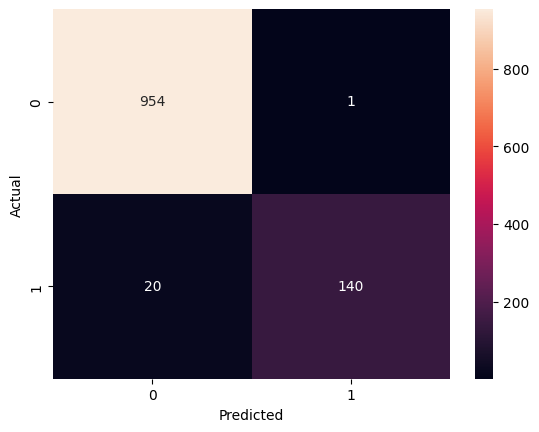

In [10]:
# annot will display the values in the heat map
# formatting will format the data values displayed in annot
sns.heatmap(confusion_matrix(y_test,y_predict), annot=True, fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [11]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       955
        spam       0.99      0.88      0.93       160

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [14]:
emails = [  "Yup next stop.",
            "UpgrdCentre Orange customer, you may now claim your FREE CAMERA PHONE upgrade for your loyalty. Call now on 0207 153 9153. Offer ends 26th July. T&C's apply. Opt-out available",
            "You have received $1000000 to your account",
            "Join with our whatsapp group",
            "Kindy check the previous email.Kind Regards"]

# get word counts
emailCv = cv.transform(emails)

# predicting whether they are spam / ham
predicted_labels = model.predict(emailCv)

# adding those data to a dataframe
df = pd.DataFrame(list(zip(emails, predicted_labels)), columns=['Emails','Label'])
df

,Emails,Label
0,Yup next stop.,ham
1,"UpgrdCentre Orange customer, you may now claim...",spam
2,You have received $1000000 to your account,ham
3,Join with our whatsapp group,ham
4,Kindy check the previous email.Kind Regards,ham
